# 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
t = time.clock()
data = pd.read_csv(r"C:\Users\Huawei\Desktop\数据挖掘作业\london-crime\london_crime_by_lsoa.csv",engine='python')#pd.read_csv读取文件，大概1300万行
print(time.clock() - t)

575.7362353999999


In [2]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
data.describe()#这里我们发现，甚至有一个月报案次数达到309次的辖区，是一个值得关注的信息

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [57]:
#为了方便绘图，我们重新按辖区、区县、主要犯罪类型、次要犯罪类型、月份、年份统计了报案数量
import time
def construct_dictionary(dic,t,value):
    if not t in dic:
        dic[t] = value
    else :
        dic[t] += value
t = time.clock()
lis = [{} for i in range(6)]
a = [0,1,2,3,5,6]
for i in range(len(data)):
    for j,k in enumerate(a):
        construct_dictionary(lis[j],data.iloc[i,k],data.iloc[i].value)
print(time.clock() - t)

13442.45633


In [5]:
lis = [{'1':1},{'Barking and Dagenham': 149447,
  'Barnet': 212191,
  'Bexley': 114136,
  'Brent': 227551,
  'Bromley': 184349,
  'Camden': 275147,
  'City of London': 780,
  'Croydon': 260294,
  'Ealing': 251562,
  'Enfield': 193880,
  'Greenwich': 181568,
  'Hackney': 217119,
  'Hammersmith and Fulham': 185259,
  'Haringey': 213272,
  'Harrow': 116848,
  'Havering': 138947,
  'Hillingdon': 209680,
  'Hounslow': 186772,
  'Islington': 230286,
  'Kensington and Chelsea': 171981,
  'Kingston upon Thames': 89306,
  'Lambeth': 292178,
  'Lewisham': 215137,
  'Merton': 115654,
  'Newham': 262024,
  'Redbridge': 183562,
  'Richmond upon Thames': 96771,
  'Southwark': 278809,
  'Sutton': 100987,
  'Tower Hamlets': 228613,
  'Waltham Forest': 203879,
  'Wandsworth': 204741,
  'Westminster': 455028},
 {'Burglary': 754293,
  'Criminal Damage': 630938,
  'Drugs': 470765,
  'Fraud or Forgery': 5325,
  'Other Notifiable Offences': 106349,
  'Robbery': 258873,
  'Sexual Offences': 1273,
  'Theft and Handling': 2661861,
  'Violence Against the Person': 1558081},
 {'Assault with Injury': 451001,
  'Burglary in Other Buildings': 263011,
  'Burglary in a Dwelling': 491282,
  'Business Property': 21295,
  'Common Assault': 413690,
  'Counted per Victim': 3840,
  'Criminal Damage To Dwelling': 154116,
  'Criminal Damage To Motor Vehicle': 265463,
  'Criminal Damage To Other Building': 66003,
  'Drug Trafficking': 35819,
  'Going Equipped': 5530,
  'Handling Stolen Goods': 16100,
  'Harassment': 458124,
  'Motor Vehicle Interference & Tampering': 56224,
  'Murder': 949,
  'Offensive Weapon': 37983,
  'Other Criminal Damage': 145356,
  'Other Drugs': 2998,
  'Other Fraud & Forgery': 1485,
  'Other Notifiable': 100819,
  'Other Sexual': 1005,
  'Other Theft': 980085,
  'Other Theft Person': 308842,
  'Other violence': 70778,
  'Personal Property': 237578,
  'Possession Of Drugs': 431948,
  'Rape': 268,
  'Theft From Motor Vehicle': 569956,
  'Theft From Shops': 345142,
  'Theft/Taking Of Motor Vehicle': 216538,
  'Theft/Taking of Pedal Cycle': 168974,
  'Wounding/GBH': 125556},
 {2008: 738641,
  2009: 717214,
  2010: 715324,
  2011: 724915,
  2012: 737329,
  2013: 686407,
  2014: 680183,
  2015: 711624,
  2016: 736121},
 {1: 530247,
  2: 500537,
  3: 551795,
  4: 520648,
  5: 552704,
  6: 549041,
  7: 563076,
  8: 532784,
  9: 522377,
  10: 558252,
  11: 549671,
  12: 516626}]

In [6]:
lis[1:6]

[{'Barking and Dagenham': 149447,
  'Barnet': 212191,
  'Bexley': 114136,
  'Brent': 227551,
  'Bromley': 184349,
  'Camden': 275147,
  'City of London': 780,
  'Croydon': 260294,
  'Ealing': 251562,
  'Enfield': 193880,
  'Greenwich': 181568,
  'Hackney': 217119,
  'Hammersmith and Fulham': 185259,
  'Haringey': 213272,
  'Harrow': 116848,
  'Havering': 138947,
  'Hillingdon': 209680,
  'Hounslow': 186772,
  'Islington': 230286,
  'Kensington and Chelsea': 171981,
  'Kingston upon Thames': 89306,
  'Lambeth': 292178,
  'Lewisham': 215137,
  'Merton': 115654,
  'Newham': 262024,
  'Redbridge': 183562,
  'Richmond upon Thames': 96771,
  'Southwark': 278809,
  'Sutton': 100987,
  'Tower Hamlets': 228613,
  'Waltham Forest': 203879,
  'Wandsworth': 204741,
  'Westminster': 455028},
 {'Burglary': 754293,
  'Criminal Damage': 630938,
  'Drugs': 470765,
  'Fraud or Forgery': 5325,
  'Other Notifiable Offences': 106349,
  'Robbery': 258873,
  'Sexual Offences': 1273,
  'Theft and Handling': 2

# 认识数据、绘制图表

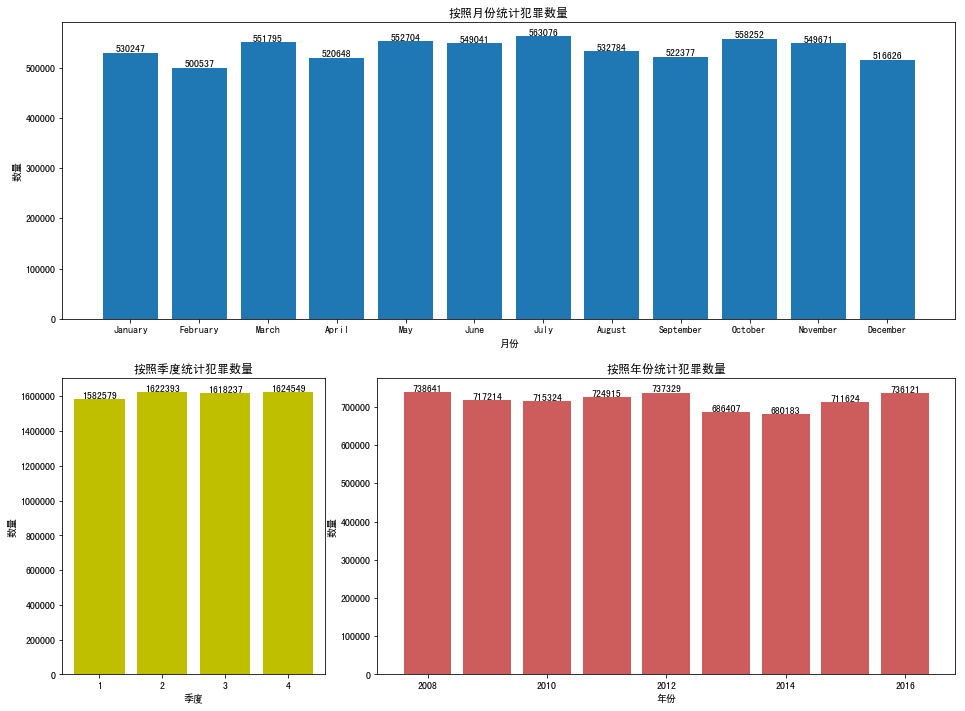

In [73]:
import matplotlib.pyplot as plt
import calendar
plt.figure(figsize = (16,12))

plt.subplot2grid((2,3),(0,0),colspan = 3)
plt.bar(lis[5].keys(),lis[5].values())
plt.title(u"按照月份统计犯罪数量")
for i,j in zip(lis[5].keys(),lis[5].values()):
    plt.text(i, j + 100, '%s' % j, ha='center', va='bottom')
plt.xlabel(u"月份")
plt.ylabel(u"数量")
x1 = range(1,13,1)
plt.xticks(x1,calendar.month_name[1:13])

y= [] 
for i in range(12):
    if (i+1)%3 == 0:
        y.append(lis[5][i-1]+lis[5][i]+lis[5][i+1])
x = [1,2,3,4]
plt.subplot2grid((2,3),(1,0))
plt.bar(x,y,fc = 'y')
plt.title(u"按照季度统计犯罪数量")
for i,j in zip(x,y):
    plt.text(i, j + 100, '%s' % j, ha='center', va='bottom')
plt.xlabel(u"季度")
plt.ylabel(u"数量")
x2 = range(1,5,1)
y2 = [1,2,3,4]
plt.xticks(x2,y2)

plt.subplot2grid((2,3),(1,1),colspan = 2)
plt.bar(lis[4].keys(),lis[4].values(),color='indianred')
plt.title(u"按照年份统计犯罪数量")
for i,j in zip(lis[4].keys(),lis[4].values()):
    plt.text(i, j + 100, '%s' % j, ha='center', va='bottom')
plt.xlabel(u"年份")
plt.ylabel(u"数量")
'''
x3 = range(1,10,1)
y3 = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.xticks(x3,y3)
'''
plt.show()


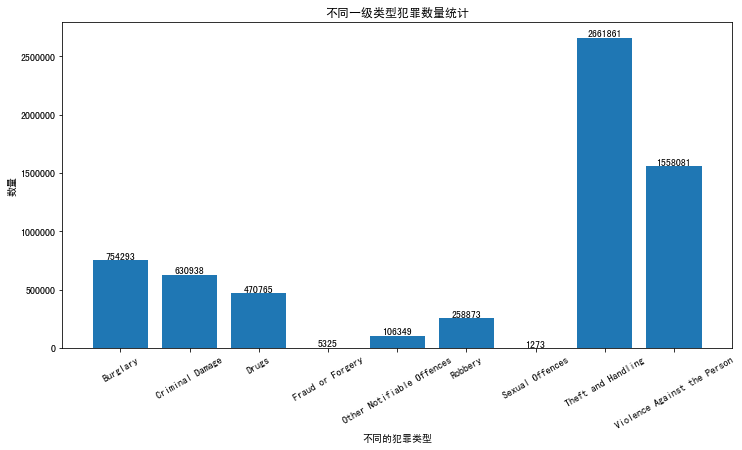

In [96]:
plt.figure(figsize = (12,6))
plt.bar(lis[2].keys(),lis[2].values())
plt.title(u"不同一级类型犯罪数量统计")
for i,j in zip(lis[2].keys(),lis[2].values()):
    plt.text(i, j + 100, '%s' % j, ha='center', va='bottom')
plt.xlabel(u"不同的犯罪类型")
plt.ylabel(u"数量")
plt.xticks(rotation = 30)
plt.show()


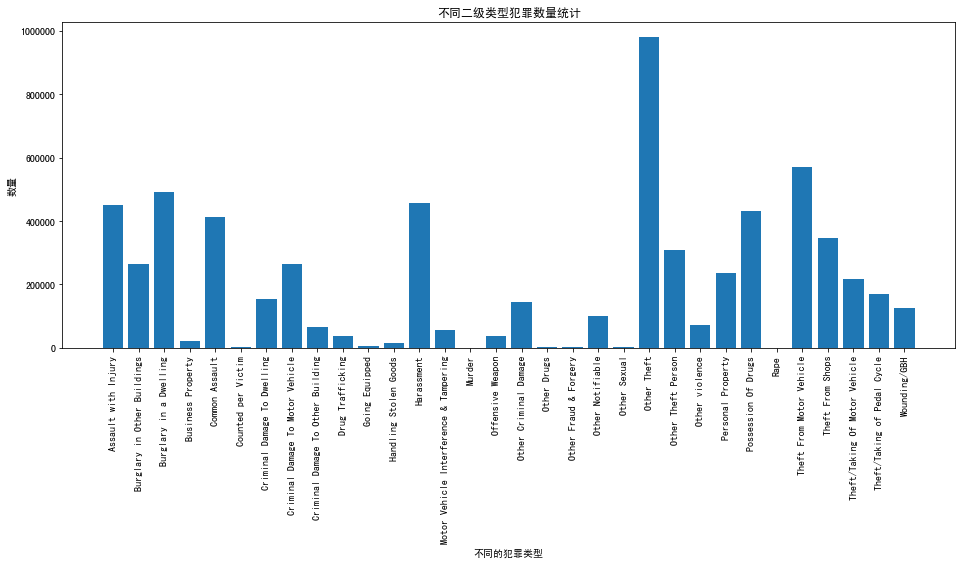

In [121]:
plt.figure(figsize = (16,6))
plt.bar(lis[3].keys(),lis[3].values())
plt.title(u"不同二级类型犯罪数量统计")
plt.xlabel(u"不同的犯罪类型")
plt.ylabel(u"数量")
plt.xticks(rotation = 90)
plt.show()


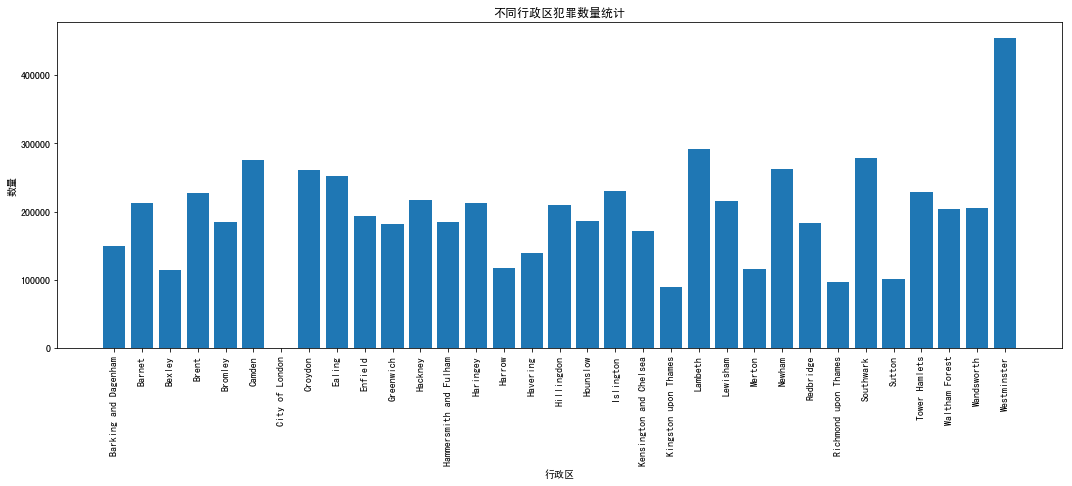

In [95]:
plt.figure(figsize = (18,6))
plt.bar(lis[1].keys(),lis[1].values())
plt.title(u"不同行政区犯罪数量统计")
plt.xlabel(u"行政区")
plt.ylabel(u"数量")
plt.xticks(rotation = 90)
plt.show()


In [11]:
#因原数据未给出主要报案类别下的次要类别有哪些，故需要我们自己统计
dic_major = {}
for i in range(10000):
    if not data.iloc[i].major_category in dic_major:
        dic_major[data.iloc[i].major_category] = [data.iloc[i].minor_category]
    else :
        if not data.iloc[i].minor_category in dic_major[data.iloc[i].major_category]:
            dic_major[data.iloc[i].major_category].append(data.iloc[i].minor_category)


In [12]:
dic_major

{'Burglary': ['Burglary in Other Buildings', 'Burglary in a Dwelling'],
 'Criminal Damage': ['Criminal Damage To Other Building',
  'Criminal Damage To Dwelling',
  'Criminal Damage To Motor Vehicle',
  'Other Criminal Damage'],
 'Drugs': ['Possession Of Drugs', 'Drug Trafficking', 'Other Drugs'],
 'Fraud or Forgery': ['Counted per Victim', 'Other Fraud & Forgery'],
 'Other Notifiable Offences': ['Going Equipped', 'Other Notifiable'],
 'Robbery': ['Personal Property', 'Business Property'],
 'Sexual Offences': ['Other Sexual', 'Rape'],
 'Theft and Handling': ['Other Theft',
  'Theft/Taking of Pedal Cycle',
  'Motor Vehicle Interference & Tampering',
  'Theft/Taking Of Motor Vehicle',
  'Other Theft Person',
  'Theft From Shops',
  'Handling Stolen Goods',
  'Theft From Motor Vehicle'],
 'Violence Against the Person': ['Other violence',
  'Offensive Weapon',
  'Wounding/GBH',
  'Common Assault',
  'Harassment',
  'Assault with Injury',
  'Murder']}

# 按照行业知识、得到伦敦地区犯罪热图

In [13]:
#给主要的犯罪类别的严重程度打分，0-10分，其中0分最轻，10分最重
dic_major_score = {'Theft and Handling':[3,5],'Violence Against the Person':[4,7], 'Criminal Damage':[0,2],'Drugs':[8,10],'Burglary':[4,6],'Robbery':[6,8], 'Other Notifiable Offences':[0,2], 'Fraud or Forgery':[5,7], 'Sexual Offences':[7,10]}
dic_minor_score = {}#给次要犯罪类别打分，使得次要犯罪类别的得分在主要的区间范围内
for i,j in dic_major.items():
    for k in j:
        dic_minor_score[k] = dic_major_score[i][1]-(lis[3][k]/lis[2][i])*(dic_major_score[i][1]-dic_major_score[i][0])

In [14]:
dic_minor_score

{'Assault with Injury': 6.131622168552212,
 'Burglary in Other Buildings': 5.302629084453919,
 'Burglary in a Dwelling': 4.697370915546081,
 'Business Property': 7.835479173185307,
 'Common Assault': 6.2034624644033265,
 'Counted per Victim': 5.55774647887324,
 'Criminal Damage To Dwelling': 1.5114702236986837,
 'Criminal Damage To Motor Vehicle': 1.1585131978102443,
 'Criminal Damage To Other Building': 1.7907781747176426,
 'Drug Trafficking': 9.847826410204666,
 'Going Equipped': 1.8960027832889825,
 'Handling Stolen Goods': 4.987903200054398,
 'Harassment': 6.117907220484686,
 'Motor Vehicle Interference & Tampering': 4.957755870798663,
 'Murder': 6.998172752251006,
 'Offensive Weapon': 6.926865804794487,
 'Other Criminal Damage': 1.5392384037734295,
 'Other Drugs': 9.987263284228861,
 'Other Fraud & Forgery': 6.44225352112676,
 'Other Notifiable': 0.10399721671101747,
 'Other Sexual': 7.631578947368421,
 'Other Theft': 4.263609181696565,
 'Other Theft Person': 4.767950317465863,
 '

In [15]:
data1 = data.copy()
data1 = data1[~data1['value'].isin([0])]

In [16]:
t = time.clock()
data1['score'] = data1['minor_category'].apply(lambda x:dic_minor_score[x])
print(time.clock() -t)

1.4220516000000316


In [17]:
data1.eval('score = value*score',inplace =True)

In [18]:
data1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,score
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,4.873041
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5,4.767950
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1,9.535901
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2,6.117907
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4,1.158513


In [19]:
result_dic = data1.groupby('borough')['score'].apply(list).to_dict() # 对于同一个key对应多个value，则把同一key的value构成一个list

In [20]:
for i,j in result_dic.items():
    result_dic[i] = sum(j)

In [21]:
result_dic

{'Barking and Dagenham': 733686.24219826714,
 'Barnet': 1026677.8271224526,
 'Bexley': 545299.98331286048,
 'Brent': 1189914.6977771872,
 'Bromley': 883559.16848448245,
 'Camden': 1373987.0428952868,
 'City of London': 3788.8049274766113,
 'Croydon': 1288542.6187045348,
 'Ealing': 1258747.3073272994,
 'Enfield': 950022.1277186696,
 'Greenwich': 888052.85555686115,
 'Hackney': 1112879.950661181,
 'Hammersmith and Fulham': 931160.68380857096,
 'Haringey': 1058076.8031025417,
 'Harrow': 574396.65756678709,
 'Havering': 669396.05098818243,
 'Hillingdon': 1002633.6384730998,
 'Hounslow': 919514.34266008437,
 'Islington': 1154719.4671511927,
 'Kensington and Chelsea': 858457.8381266084,
 'Kingston upon Thames': 433291.71359274705,
 'Lambeth': 1490839.5106528113,
 'Lewisham': 1083380.29904776,
 'Merton': 561566.31046454073,
 'Newham': 1319788.5417806476,
 'Redbridge': 919920.71184867946,
 'Richmond upon Thames': 460040.35152612574,
 'Southwark': 1432073.0425156928,
 'Sutton': 478734.024078861

In [22]:
lis = ['#ffffff',
'#faf5f9',
'#f0e2ec',
'#ebd9e6',
'#e0c5d8',
'#d9b9d0',
'#d6afcb',
'#cfa2c2',
'#c797ba',
'#bd86ad',
'#b57ba5',
'#ad729c',
'#a36892',
'#9e628d',
'#965a85',
'#8c547c',
'#8a4e79',
'#854573',
'#80416e',
'#783966',
'#733561',
'#6b2d59',
'#5c254c',
'#571f47',
'#4f1b40',
'#4d183e',
'#471539',
'#401133',
'#330d28',
'#330c28',
'#2e0923',
'#2b0821',
'#000000']

In [23]:
# coding=utf-8
import sys
from imp import reload
reload(sys)
import csv
from bs4 import BeautifulSoup
def DrawBlockMap(file_name):
    reader = csv.reader(open(file_name,'r'), delimiter = ",")
    svg = open(r'C:\Users\Huawei\Desktop\数据挖掘作业\london-crime\London.svg','r',encoding='UTF-8').read() #读取伦敦市地图数据
    Price = {}
    price_only = []#记录各市的数值
    sort_value = []#记录
    sort_no = []#记录各市的排名
    for row in reader:#遍历读取的文件每一行
        try:
            temp = row[0]#序号
            price = float(row[1].strip())#价格
            Price[temp] = price
            price_only.append(price)
            sort_value.append(price)
        except:
            pass
    sort_value.sort()#对所有数值默认升序排序，计算记录各市的排名
    for i in range(len(price_only)):
        for j in range(len(sort_value)):
            if (price_only[i] == sort_value[j]):
                sort_no.append(j)#记录当前排名
                break
    soup = BeautifulSoup(svg,"lxml")
    paths = soup.findAll('path')
    #颜色列表
    colors = lis
    path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'
    count = 0
    for p in paths:
        try:
            color_class = sort_no[count]#根据排名染不同的颜色，排名越前说明值越小，所以颜色越浅
            count += 1
        except:
            continue
        color = colors[color_class]
        p['style'] = path_style + color#改变地图对应区域的颜色
    ff = open(r"C:\Users\Huawei\Desktop\数据挖掘作业\london-crime\伦敦犯罪热区.svg","w",encoding = 'utf-8')
    ff.write(soup.prettify())
   # print(soup.prettify())
if __name__=='__main__':
    DrawBlockMap(r"C:\Users\Huawei\Desktop\数据挖掘作业\london-crime\伦敦.txt")

# 模型构建

In [24]:
maxs = max(data1['score'])
mins = min(data1['score'])
print('最大分数=%.3f' % maxs)
print('最小分数=%.3f' % mins)

最大分数=2522.957
最小分数=0.104


In [25]:
data['score'] = data1['score']
data.replace(np.nan, 0, inplace=True)
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,score
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,0.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,0.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,0.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,0.0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,0.0


In [26]:
def fun(x):
    if x == 0:
        return 0
    if 0 < x < 10:
        return 1
    if 10 <= x < 50:
        return 2
    if 50 <= x < 200:
        return 3
    if x >= 200:
        return 4
data['score_ranking'] = data['score'].apply(lambda x:fun(x))
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,score,score_ranking
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,0.0,0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,0.0,0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,0.0,0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,0.0,0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,0.0,0


In [34]:
df1 = pd.get_dummies(data.borough,prefix = 'borough')
df2 = pd.get_dummies(data.month,prefix = 'month')
df3 = pd.get_dummies(data.major_category,prefix = 'major')
df4 = pd.get_dummies(data.minor_category,prefix = 'minor')
df_test = pd.concat([df1,df2,df3,df4,data.score_ranking,data.year],axis = 1)

In [35]:
df_test.head()

,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,borough_Brent,borough_Bromley,borough_Camden,borough_City of London,borough_Croydon,borough_Ealing,borough_Enfield,...,minor_Personal Property,minor_Possession Of Drugs,minor_Rape,minor_Theft From Motor Vehicle,minor_Theft From Shops,minor_Theft/Taking Of Motor Vehicle,minor_Theft/Taking of Pedal Cycle,minor_Wounding/GBH,score_ranking,year
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2016
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2008


In [36]:
train_np = df_test[df_test.year == 2015].filter(regex = 'borough_.*|month_.*|major.*|minor.*|score_ranking').as_matrix()
train_np.shape

(1498956, 87)

In [37]:
x = train_np[:,:-1]
y = train_np[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

# 开始预测s
predict_target = clf.predict(x_test)
#预测结果与真实结果比对
print(sum(predict_target == y_test)) 
print(metrics.classification_report(y_test,predict_target))
#建立一个矩阵，以真实标签和预测标签为元素
print(metrics.confusion_matrix(y_test,predict_target))


336554
             precision    recall  f1-score   support

          0       0.77      0.97      0.86    335407
          1       0.43      0.10      0.16     85532
          2       0.37      0.09      0.14     27522
          3       0.00      0.00      0.00      1159
          4       0.00      0.00      0.00        67

avg / total       0.68      0.75      0.68    449687



d:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[325558   7740   2109      0      0]
 [ 75036   8556   1940      0      0]
 [ 21826   3256   2440      0      0]
 [   829    250     80      0      0]
 [    46     20      1      0      0]]


In [55]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split


def load_data():
     # 将数据划分为训练集和测试集，test_size=.3表示30%的测试集
    x_train, x_test, y_train, y_test = train_test_split(x[:5000], y, test_size=.3)
    return x_train, x_test, y_train, y_test


def svm_c(x_train, x_test, y_train, y_test):
    # rbf核函数，设置数据权重
    svc = SVC(kernel='rbf', class_weight='balanced',)
    c_range = np.logspace(-5, 15, 11, base=2)
    gamma_range = np.logspace(-9, 3, 13, base=2)
    # 网格搜索交叉验证的参数范围，cv=3,3折交叉
    param_grid = [{'kernel': ['rbf'], 'C': c_range, 'gamma': gamma_range}]
    grid = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1)
    # 训练模型
    clf = grid.fit(x_train, y_train)
    predict_target = clf.predict(x_test)
    # 计算测试集精度
    print(metrics.classification_report(y_test,predict_target))
    score = grid.score(x_test, y_test)
    print('精度为%s' % score)

if __name__ == '__main__':
    t = time.clock()
    svm_c(*load_data())
    print(time.clock()-t)

d:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


             precision    recall  f1-score   support

          0       0.79      0.97      0.87       118
          1       0.00      0.00      0.00        23
          2       0.50      0.11      0.18         9

avg / total       0.65      0.77      0.70       150

精度为0.773333333333
4.620009399999617
